In [4]:
# Import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
from datetime import datetime
from matplotlib import colors
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from app import db
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

df=db.session.execute('SELECT c.client_id, u.dateofbirth, u.city, f.investmentgoal, f.yeartorealisegoal, f.endgoal, f.annualincome, f.estimatednetworth, f.topupamountmonthly, f.valueofcurrentinvestment, f.equity, f.fixedincome, f.forexcommodities, f.mutualfund, f.crypto, f.realestate, f.otherinvestment, f.prioritiesofinvestment, f.riskappetite, f.dropvalue FROM User u, Client c, FinancialGoal f WHERE u.banker=0 AND u.id =c.userid AND c.client_id=f.client_id')
# resultslist=[]
#     for result in df:
#         resulttemp=[]
#         for indiv in result:
#             resulttemp.append(indiv)
#         resultslist.append(resulttemp)

df=pd.DataFrame(df)

 
def age(birthdate):
    today = date.today()
    hi = today.year - datetime.strptime(birthdate, '%Y/%m/%d').year - ((today.month, today.day) < (datetime.strptime(birthdate, '%Y/%m/%d').month, datetime.strptime(birthdate, '%Y/%m/%d').day))
    return hi
df['age']=0
for n in range(0,df.shape[0]):
    df['age'][n]=age(df['dateofbirth'][n])
LE=LabelEncoder()
obj=['city','investmentgoal','dropvalue','prioritiesofinvestment']
for i in obj:
    df[i]=df[[i]].apply(LE.fit_transform)
new_df = df.drop(['dateofbirth'],axis=1)
scaler = StandardScaler()
scaler.fit(new_df)
scaled_features = pd.DataFrame(scaler.transform(new_df),columns= new_df.columns )

pca = PCA(n_components=3)
pca.fit(scaled_features)
PCA_df = pd.DataFrame(pca.transform(scaled_features), columns=(["col1","col2", "col3"]))
PCA_df.describe().T



NameError: name 'date' is not defined

In [5]:
df

,client_id,dateofbirth,city,investmentgoal,yeartorealisegoal,endgoal,annualincome,estimatednetworth,topupamountmonthly,valueofcurrentinvestment,...,fixedincome,forexcommodities,mutualfund,crypto,realestate,otherinvestment,prioritiesofinvestment,riskappetite,dropvalue,age
0,1,2001/08/22,Hong Kong,General Investment,5,100000,60000,20000,2000,5000,...,10,10,20,30,20,0,Maximise Gain,12,Buy More,0
1,28,1985/01/05,Singapore,Car,5,150000,65000,21000,2500,8000,...,10,10,20,30,10,0,Minimise Loss,7,Do Nothing,0
2,3,1977/07/22,Hong Kong,House,7,500000,40000,15000,1500,5500,...,15,10,15,30,10,0,Equal Emphasis,12,Sell parts of my portfolio,0
3,5,1960/10/23,Hong Kong,Retirement,30,1000000,100000,300000,3000,100000,...,10,5,15,5,25,0,Minimise Loss,5,Buy More,0
4,6,1983/05/06,Hong Kong,Children Education,15,50000,50000,10000,1000,2000,...,20,0,25,20,30,0,Maximise Gain,3,Sell Everything,0
5,25,1963/12/28,Hong Kong,General Investment,10,150000,50000,30000,2000,3000,...,30,0,20,30,0,0,Maximise Gain,15,Buy More,0
6,12,1955/12/22,Hong Kong,House,6,400000,55000,100000,1500,20000,...,20,10,15,25,0,0,Equal Emphasis,11,Buy More,0
7,8,1907/07/22,Hong Kong,Car,3,100000,40000,20000,2000,5000,...,10,10,20,30,20,0,Maximise Gain,12,Buy More,0
8,13,1917/03/24,Hong Kong,Retirement,35,1500000,65000,90000,2000,6000,...,30,10,20,0,20,0,Minimise Loss,8,Do Nothing,0
9,7,1931/11/17,Hong Kong,Children Education,18,120000,50000,25000,500,2000,...,20,0,25,20,30,0,Minimise Loss,3,Sell Everything,0


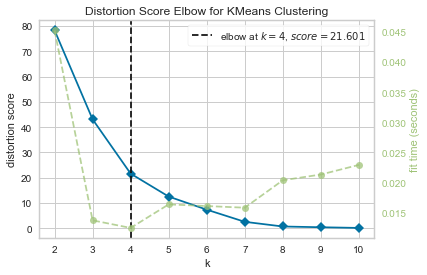

In [41]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()
k_value=Elbow_M.elbow_value_

In [42]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=k_value)
# fit model and predict clusters
AC_df = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = AC_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters_AC"]= AC_df

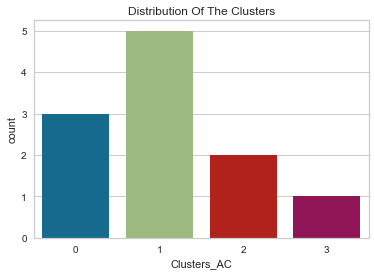

In [44]:
pl = sns.countplot(x=df["Clusters_AC"])
pl.set_title("Distribution Of The Clusters")
plt.show()

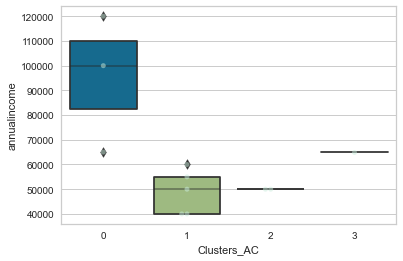

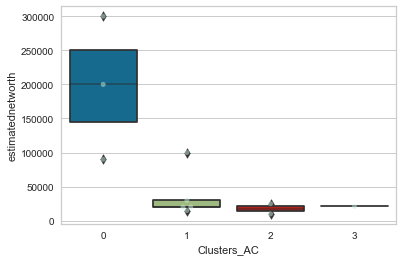

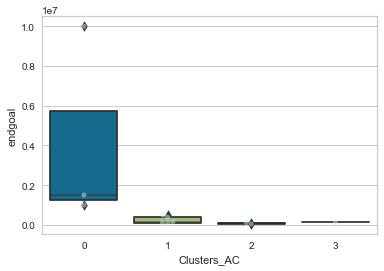

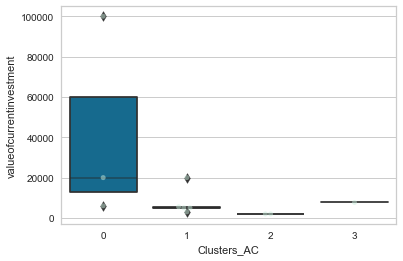

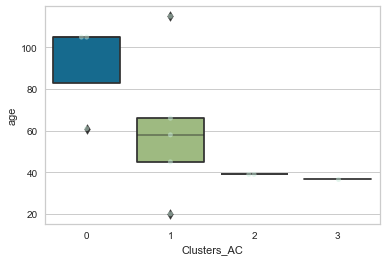

In [50]:
attributes=['annualincome','estimatednetworth','endgoal','valueofcurrentinvestment','age']
for i in attributes:
    plt.figure()
    pl=sns.swarmplot(x=df['Clusters_AC'], y=df[i], color= "#CBEDDD", alpha=0.5 )
    pl=sns.boxenplot(x=df['Clusters_AC'], y=df[i])
    plt.savefig(f'app/static/images/AC_cluster_{i}.png')

In [ ]:
from sklearn.cluster import AffinityPropagation
#Initiating the Affinity Clustering model 
AP = AffinityPropagation(damping=0.9)
# fit model and predict clusters
AP_df = AP.fit_predict(PCA_df)
PCA_df["Clusters"] = AP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters_AP"]= AP_df

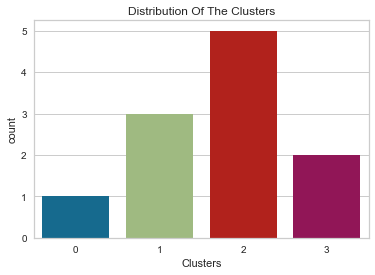

In [ ]:
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [33]:
from sklearn.cluster import Birch
#Initiating the Birch Clustering model 
BP = Birch(threshold=0.01, n_clusters=4)
# fit model and predict clusters
BP_df = BP.fit_predict(PCA_df)
PCA_df["Clusters"] = BP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters_BP"]= BP_df

In [46]:
df

,client_id,dateofbirth,city,investmentgoal,yeartorealisegoal,endgoal,annualincome,estimatednetworth,topupamountmonthly,valueofcurrentinvestment,...,forexcommodities,mutualfund,crypto,realestate,otherinvestment,prioritiesofinvestment,riskappetite,dropvalue,age,Clusters_AC
0,1,2001/08/22,0,2,5,100000,60000,20000,2000,5000,...,10,20,30,20,0,1,12,0,20,1
1,28,1985/01/05,1,0,5,150000,65000,21000,2500,8000,...,10,20,30,10,0,2,7,1,37,3
2,3,1977/07/22,0,3,7,500000,40000,15000,1500,5500,...,10,15,30,10,0,0,12,3,45,1
3,5,1960/10/23,0,4,30,1000000,100000,300000,3000,100000,...,5,15,5,25,0,2,5,0,61,0
4,6,1983/05/06,0,1,15,50000,50000,10000,1000,2000,...,0,25,20,30,0,1,3,2,39,2
5,25,1963/12/28,0,2,10,150000,50000,30000,2000,3000,...,0,20,30,0,0,1,15,0,58,1
6,13,1917/03/24,0,4,25,10000000,120000,200000,4000,20000,...,10,20,20,0,0,1,8,1,105,0
7,12,1955/12/22,0,3,6,400000,55000,100000,1500,20000,...,10,15,25,0,0,0,11,0,66,1
8,8,1907/07/22,0,0,3,100000,40000,20000,2000,5000,...,10,20,30,20,0,1,12,0,115,1
9,13,1917/03/24,0,4,35,1500000,65000,90000,2000,6000,...,10,20,0,20,0,2,8,1,105,0


In [35]:
from sklearn.cluster import DBSCAN
#Initiating the BBSCAN Clustering model 
DP = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
DP_df = DP.fit_predict(PCA_df)
PCA_df["Clusters"] = DP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters_DP"]= DP_df


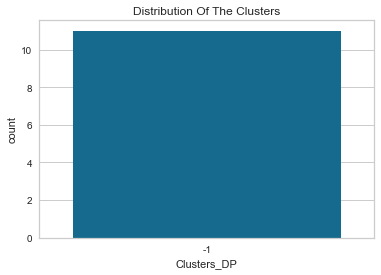

In [37]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters_DP"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [38]:
from sklearn.cluster import MiniBatchKMeans
#Initiating the MiniBatchKMeans Clustering model 
MP = MiniBatchKMeans(n_clusters=4)
# fit model and predict clusters
MP_df = MP.fit_predict(PCA_df)
PCA_df["Clusters"] = MP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters_MP"]= MP_df

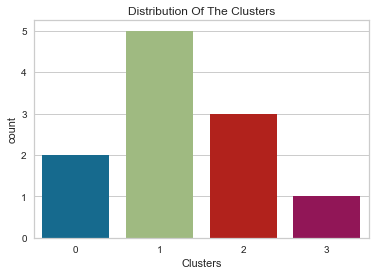

In [21]:
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [56]:
df.iloc[0,2]

0

In [57]:
df

,client_id,dateofbirth,city,investmentgoal,yeartorealisegoal,endgoal,annualincome,estimatednetworth,topupamountmonthly,valueofcurrentinvestment,...,forexcommodities,mutualfund,crypto,realestate,otherinvestment,prioritiesofinvestment,riskappetite,dropvalue,age,Clusters_AC
0,1,2001/08/22,0,2,5,100000,60000,20000,2000,5000,...,10,20,30,20,0,1,12,0,20,1
1,28,1985/01/05,1,0,5,150000,65000,21000,2500,8000,...,10,20,30,10,0,2,7,1,37,3
2,3,1977/07/22,0,3,7,500000,40000,15000,1500,5500,...,10,15,30,10,0,0,12,3,45,1
3,5,1960/10/23,0,4,30,1000000,100000,300000,3000,100000,...,5,15,5,25,0,2,5,0,61,0
4,6,1983/05/06,0,1,15,50000,50000,10000,1000,2000,...,0,25,20,30,0,1,3,2,39,2
5,25,1963/12/28,0,2,10,150000,50000,30000,2000,3000,...,0,20,30,0,0,1,15,0,58,1
6,13,1917/03/24,0,4,25,10000000,120000,200000,4000,20000,...,10,20,20,0,0,1,8,1,105,0
7,12,1955/12/22,0,3,6,400000,55000,100000,1500,20000,...,10,15,25,0,0,0,11,0,66,1
8,8,1907/07/22,0,0,3,100000,40000,20000,2000,5000,...,10,20,30,20,0,1,12,0,115,1
9,13,1917/03/24,0,4,35,1500000,65000,90000,2000,6000,...,10,20,0,20,0,2,8,1,105,0


In [12]:
# Import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
from datetime import datetime
from matplotlib import colors
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

import warnings
import sys
from app import db
df=db.session.execute('SELECT c.client_id, u.dateofbirth, u.city, f.investmentgoal, f.yeartorealisegoal, f.endgoal, f.annualincome, f.estimatednetworth, f.topupamountmonthly, f.valueofcurrentinvestment, f.equity, f.fixedincome, f.forexcommodities, f.mutualfund, f.crypto, f.realestate, f.otherinvestment, f.prioritiesofinvestment, f.riskappetite, f.dropvalue FROM User u, Client c, FinancialGoal f WHERE u.banker=0 AND u.id =c.userid AND c.client_id=f.client_id')
df =pd.DataFrame(df)


In [13]:
df

,client_id,dateofbirth,city,investmentgoal,yeartorealisegoal,endgoal,annualincome,estimatednetworth,topupamountmonthly,valueofcurrentinvestment,equity,fixedincome,forexcommodities,mutualfund,crypto,realestate,otherinvestment,prioritiesofinvestment,riskappetite,dropvalue
0,1,2001/08/22,Hong Kong,General Investment,5,100000,60000,20000,2000,5000,10,10,10,20,30,20,0,Maximise Gain,12,Buy More
1,28,1985/01/05,Singapore,Car,5,150000,65000,21000,2500,8000,20,10,10,20,30,10,0,Minimise Loss,7,Do Nothing
2,3,1977/07/22,Hong Kong,House,7,500000,40000,15000,1500,5500,20,15,10,15,30,10,0,Equal Emphasis,12,Sell parts of my portfolio
3,5,1960/10/23,Hong Kong,Retirement,30,1000000,100000,300000,3000,100000,40,10,5,15,5,25,0,Minimise Loss,5,Buy More
4,6,1983/05/06,Hong Kong,Children Education,15,50000,50000,10000,1000,2000,5,20,0,25,20,30,0,Maximise Gain,3,Sell Everything
5,25,1963/12/28,Hong Kong,General Investment,10,150000,50000,30000,2000,3000,20,30,0,20,30,0,0,Maximise Gain,15,Buy More
6,13,1917/03/24,Hong Kong,Retirement,25,10000000,120000,200000,4000,20000,40,10,10,20,20,0,0,Maximise Gain,8,Do Nothing
7,12,1955/12/22,Hong Kong,House,6,400000,55000,100000,1500,20000,30,20,10,15,25,0,0,Equal Emphasis,11,Buy More
8,8,1907/07/22,Hong Kong,Car,3,100000,40000,20000,2000,5000,10,10,10,20,30,20,0,Maximise Gain,12,Buy More
9,13,1917/03/24,Hong Kong,Retirement,35,1500000,65000,90000,2000,6000,20,30,10,20,0,20,0,Minimise Loss,8,Do Nothing


In [14]:
#         resultslist.append(resulttemp)
class clustering():
    def AC_cluster(shelf,df):
            def age(birthdate):
                today = date.today()
                hi = today.year - datetime.strptime(birthdate, '%Y/%m/%d').year - ((today.month, today.day) < (datetime.strptime(birthdate, '%Y/%m/%d').month, datetime.strptime(birthdate, '%Y/%m/%d').day))
                return hi
            df['age']=0
            for n in range(0,df.shape[0]):
                df['age'][n]=age(df['dateofbirth'][n])
            LE=LabelEncoder()
            obj=['city','investmentgoal','dropvalue','prioritiesofinvestment']
            for i in obj:
                df[i]=df[[i]].apply(LE.fit_transform)
            new_df = df.drop(['dateofbirth'],axis=1)
            scaler = StandardScaler()
            scaler.fit(new_df)
            scaled_features = pd.DataFrame(scaler.transform(new_df),columns= new_df.columns )
            pca = PCA(n_components=3)
            pca.fit(scaled_features)
            PCA_df = pd.DataFrame(pca.transform(scaled_features), columns=(["col1","col2", "col3"]))
            from sklearn.cluster import KMeans
            from sklearn.datasets import make_blobs
            from yellowbrick.cluster import KElbowVisualizer
            Elbow_M = KElbowVisualizer(KMeans(), k=10)
            Elbow_M.fit(PCA_df)
            Elbow_M.show()
            k_value=Elbow_M.elbow_value_
            #Initiating the Agglomerative Clustering model 
            AC = AgglomerativeClustering(n_clusters=k_value)
            # fit model and predict clusters
            AC_df = AC.fit_predict(PCA_df)
            PCA_df["Clusters"] = AC_df
            #Adding the Clusters feature to the orignal dataframe.
            df["Clusters_AC"]= AC_df
            attributes=['annualincome','estimatednetworth','endgoal','valueofcurrentinvestment','age']
            for i in attributes:
                plt.figure()
                pl=sns.swarmplot(x=df['Clusters_AC'], y=df[i], color= "#CBEDDD", alpha=0.5 )
                pl=sns.boxenplot(x=df['Clusters_AC'], y=df[i])
                plt.savefig(f'app/static/images/AC_cluster_{i}.png')
            return df

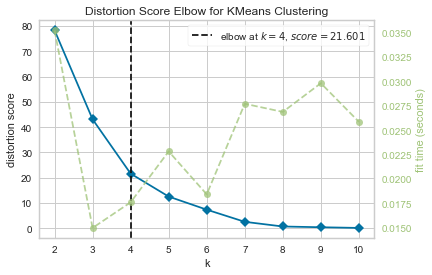

,client_id,dateofbirth,city,investmentgoal,yeartorealisegoal,endgoal,annualincome,estimatednetworth,topupamountmonthly,valueofcurrentinvestment,...,forexcommodities,mutualfund,crypto,realestate,otherinvestment,prioritiesofinvestment,riskappetite,dropvalue,age,Clusters_AC
0,1,2001/08/22,0,2,5,100000,60000,20000,2000,5000,...,10,20,30,20,0,1,12,0,20,1
1,28,1985/01/05,1,0,5,150000,65000,21000,2500,8000,...,10,20,30,10,0,2,7,1,37,3
2,3,1977/07/22,0,3,7,500000,40000,15000,1500,5500,...,10,15,30,10,0,0,12,3,45,1
3,5,1960/10/23,0,4,30,1000000,100000,300000,3000,100000,...,5,15,5,25,0,2,5,0,61,0
4,6,1983/05/06,0,1,15,50000,50000,10000,1000,2000,...,0,25,20,30,0,1,3,2,39,2
5,25,1963/12/28,0,2,10,150000,50000,30000,2000,3000,...,0,20,30,0,0,1,15,0,58,1
6,13,1917/03/24,0,4,25,10000000,120000,200000,4000,20000,...,10,20,20,0,0,1,8,1,105,0
7,12,1955/12/22,0,3,6,400000,55000,100000,1500,20000,...,10,15,25,0,0,0,11,0,66,1
8,8,1907/07/22,0,0,3,100000,40000,20000,2000,5000,...,10,20,30,20,0,1,12,0,115,1
9,13,1917/03/24,0,4,35,1500000,65000,90000,2000,6000,...,10,20,0,20,0,2,8,1,105,0


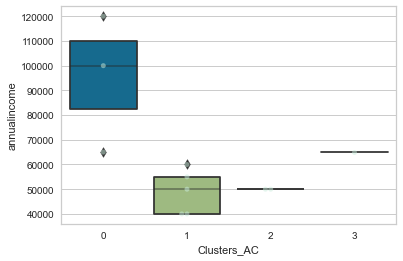

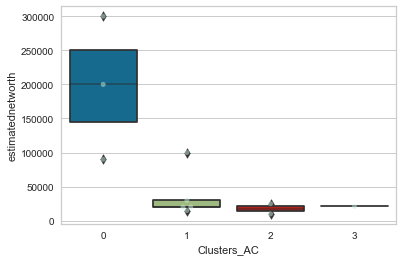

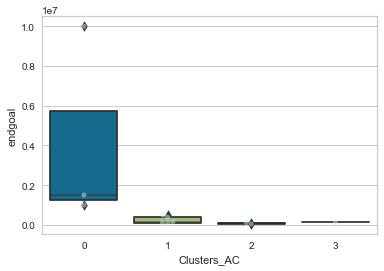

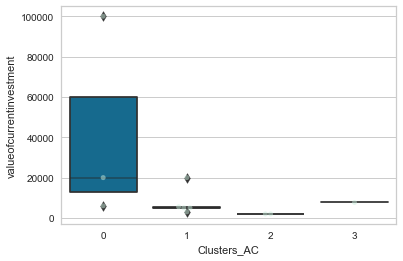

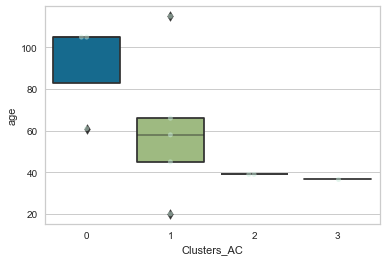

In [17]:
clustering().AC_cluster(df=df)